### Загрузка пакетов

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датасета

In [57]:
churn_df = pd.read_csv('telecom_churn_clean.csv', index_col=0)
print(churn_df)

      account_length  area_code  ...  customer_service_calls  churn
0                128        415  ...                       1      0
1                107        415  ...                       1      0
2                137        415  ...                       0      0
3                 84        408  ...                       2      0
4                 75        415  ...                       3      0
...              ...        ...  ...                     ...    ...
3328             192        415  ...                       2      0
3329              68        415  ...                       3      0
3330              28        510  ...                       2      0
3331             184        510  ...                       2      0
3332              74        415  ...                       0      0

[3333 rows x 19 columns]


In [58]:
churn_df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

### Разделим на целевую и независимые переменные

In [59]:
y = churn_df['churn'].values
X = churn_df[['total_day_calls', 'customer_service_calls']].values

In [60]:
print(X)

[[110   1]
 [123   1]
 [114   0]
 ...
 [109   2]
 [105   2]
 [113   0]]


In [61]:
print(y)

[0 0 0 ... 0 0 0]


### Построение классификатора

In [62]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
df = churn_df[['total_day_calls', 'customer_service_calls', 'churn']]

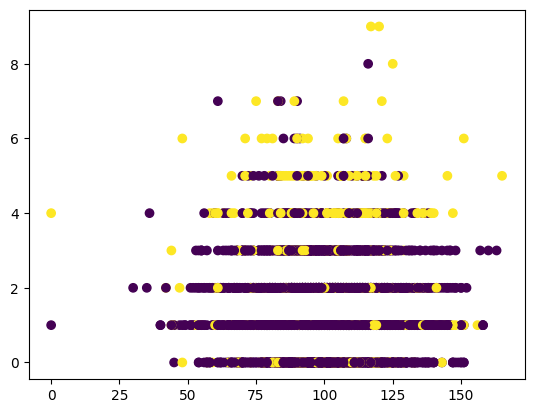

In [64]:
plt.scatter(df['total_day_calls'], df['customer_service_calls'], c=df['churn'])
plt.show()

### Создание набора для тестирования

In [65]:
X_new = np.array([
  [95, 0],
  [99, 1],
  [123, 5],
  [15, 83],
  [150, 6],
  [32, 0]]
)

### Предсказание

In [66]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 0 0 0 0 0]


### Разивка данных на test/train

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


In [68]:
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [69]:
print(knn.score(X_test, y_test))

0.856071964017991
